Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the pregnancy file.

In [2]:
%matplotlib inline
import thinkstats2
import thinkplot
import nsfg
preg = nsfg.ReadFemPreg()
print preg.columns

Index([         u'caseid',        u'pregordr',       u'howpreg_n',
             u'howpreg_p',        u'moscurrp',        u'nowprgdk',
              u'pregend1',        u'pregend2',        u'nbrnaliv',
              u'multbrth',
       ...
            u'laborfor_i',      u'religion_i',         u'metro_i',
               u'basewgt', u'adj_mod_basewgt',        u'finalwgt',
                u'secu_p',            u'sest',         u'cmintvw',
           u'totalwgt_lb'],
      dtype='object', length=244)


Select live births, then make a CDF of <tt>totalwgt_lb</tt>. 

In [5]:
live = preg[preg.outcome == 1]
cdf = thinkstats2.Cdf(live.totalwgt_lb)
print live.totalwgt_lb.describe()

count    9038.000000
mean        7.265628
std         1.408293
min         0.125000
25%         6.500000
50%         7.375000
75%         8.125000
max        15.437500
Name: totalwgt_lb, dtype: float64


Display the CDF.

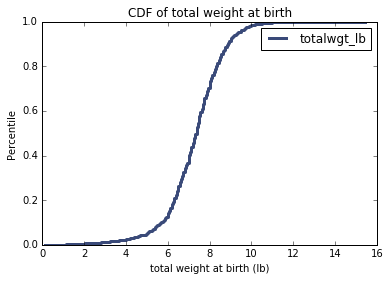

In [7]:
thinkplot.Cdf(cdf, label = 'totalwgt_lb')
thinkplot.Show(title = 'CDF of total weight at birth',xlabel = 'total weight at birth (lb)', ylabel = 'Percentile')

Find out how much you weighed at birth, if you can, and compute CDF(x). 

In [8]:
cdf.Prob(8.2)

0.77362248285018809

If you are a first child, look up your birthweight in the CDF of first children; otherwise use the CDF of other children.

In [9]:
first = live[live.birthord == 1]
cdf_first = thinkstats2.Cdf(first.totalwgt_lb)
cdf_first.Prob(8.2)

0.79417831767132707

Compute the percentile rank of your birthweight

In [10]:
cdf.PercentileRank(8.2)

77.362248285018808

Compute the median birth weight by looking up the value associated with p=0.5.

In [11]:
cdf.Value(0.5)

7.375

Compute the interquartile range (IQR) by computing percentiles corresponding to 25 and 75. 

In [12]:
print cdf.Percentile(25)
print cdf.Percentile(75)

6.5
8.125


Make a random selection from <tt>cdf</tt>.

In [13]:
cdf.Random()

6.9375

Draw a random sample from <tt>cdf</tt>.

In [15]:
cdf.Sample(7)

array([ 7.5625,  7.25  ,  6.375 ,  7.5   ,  6.4375,  5.5   ,  6.625 ])

Draw a random sample from <tt>cdf</tt>, then compute the percentile rank for each value, and plot the distribution of the percentile ranks.

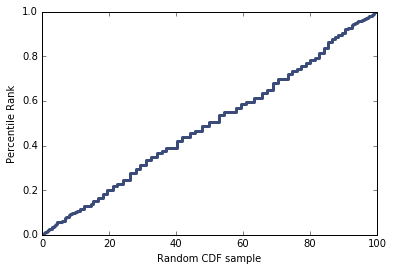

In [17]:
random_percentile = [cdf.PercentileRank(x) for x in cdf.Sample(500)]
cdf2_random = thinkstats2.Cdf(random_percentile)
thinkplot.Cdf(cdf2_random)
thinkplot.Show(ylabel = 'Percentile Rank', xlabel = 'Random CDF sample')

Generate 1000 random values using <tt>random.random()</tt> and plot their PMF.

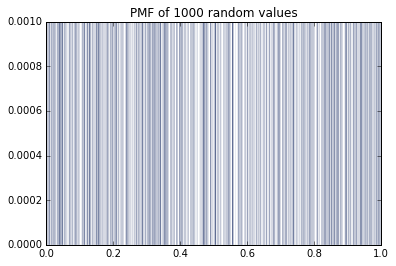

In [21]:
import random 
random_value = []
for x in range(1000):
    random_value.append(random.random())
pmf = thinkstats2.Pmf(random_value)
thinkplot.Pmf(pmf,linewidth = 0.05)
thinkplot.Show(title = 'PMF of 1000 random values')

Assuming that the PMF doesn't work very well, try plotting the CDF instead.

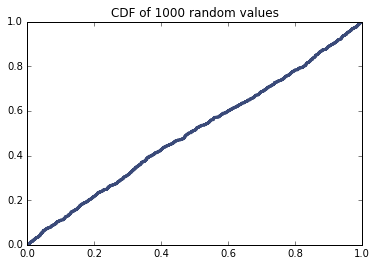

In [22]:
cdf = thinkstats2.Cdf(random_value)
thinkplot.Cdf(cdf)
thinkplot.Show(title = 'CDF of 1000 random values')

### Clarifying Questions

Use this space to ask questions regarding the content covered in the reading. These questions should be restricted to helping you better understand the material. For questions that push beyond what is in the reading, use the next answer field. If you don't have a fully formed question, but are generally having a difficult time with a topic, you can indicate that here as well.

So for the last two exercises: we can see that PMF is not working well from the graph right? What about for CDF - graphs vary quite a bit in how they appear. When does Cdf not work very well and how can we tell graphically?

### Enrichment Questions

Use this space to ask any questions that go beyond (but are related to) the material presented in this reading. Perhaps there is a particular topic you'd like to see covered in more depth. Perhaps you'd like to know how to use a library in a way that wasn't show in the reading. One way to think about this is what additional topics would you want covered in the next class (or addressed in a followup e-mail to the class). I'm a little fuzzy on what stuff will likely go here, so we'll see how things evolve.

### Additional Resources / Explorations

If you found any useful resources, or tried some useful exercises that you'd like to report please do so here. Let us know what you did, what you learned, and how others can replicate it.